In [28]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [29]:
dados = pd.read_csv('/content/TelecomX_Dados_Tratados.csv')

dados.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/TelecomX_Dados_Tratados.csv'

In [3]:

dados_numericos = dados.select_dtypes(include=['number', 'bool'])
correlacao = dados_numericos.corr().abs()

colunas_relacionadas = [(coluna1, coluna2)
    for coluna1 in correlacao.columns
    for coluna2 in correlacao.columns
    if coluna1 != coluna2 and correlacao.loc[coluna1, coluna2] > 0.95]


print(" Pares de Colunas Relacionadas:")
print('-' * 41)

for coluna_a, coluna_b in colunas_relacionadas:
    print(f" {coluna_a} - {coluna_b}")

print('-' * 41)
print(f"Total de pares: {len(colunas_relacionadas)}")

 Pares de Colunas Relacionadas:
-----------------------------------------
 Meses_de_Contrato - tempo_estimado_meses
 Valor_Mensal - Conta_Diarias
 tempo_estimado_meses - Meses_de_Contrato
 Conta_Diarias - Valor_Mensal
-----------------------------------------
Total de pares: 4


In [4]:
dados = dados.drop(['ID_Cliente', 'tempo_estimado_meses', 'Conta_Diarias', 'Valor_Total'], axis=1)


dados = dados[dados['Cancelamento'] != 'Não informado']

dados.head()

,Cancelamento,Gênero,Idoso,Possui_Companheiro,Possui_Dependentes,Meses_de_Contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Forma_Pagamento,Valor_Mensal
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9


In [5]:

colunas_categoricas = dados.select_dtypes(include=['object']).columns

for coluna in colunas_categoricas:

    display(HTML(f"<h4> {coluna.upper()}</h4>"))


    frequencia = (
        dados[coluna]
        .value_counts(dropna=False)
        .head(3)
        .to_frame(name='Frequência')
    )


    display(frequencia)


    print("-" * 40)



,Frequência
Cancelamento,
No,5163
Yes,1869


----------------------------------------


,Frequência
Gênero,
Male,3549
Female,3483


----------------------------------------


,Frequência
Possui_Companheiro,
No,3639
Yes,3393


----------------------------------------


,Frequência
Possui_Dependentes,
No,4933
Yes,2099


----------------------------------------


,Frequência
Telefone_Ativo,
Yes,6352
No,680


----------------------------------------


,Frequência
Multiplas_Linhas,
No,3385
Yes,2967
No phone service,680


----------------------------------------


,Frequência
Tipo_Internet,
Fiber optic,3096
DSL,2416
No,1520


----------------------------------------


,Frequência
Seguranca_Online,
No,3497
Yes,2015
No internet service,1520


----------------------------------------


,Frequência
Backup_Online,
No,3087
Yes,2425
No internet service,1520


----------------------------------------


,Frequência
Protecao_Dispositivo,
No,3094
Yes,2418
No internet service,1520


----------------------------------------


,Frequência
Suporte_Tecnico,
No,3472
Yes,2040
No internet service,1520


----------------------------------------


,Frequência
Streaming_TV,
No,2809
Yes,2703
No internet service,1520


----------------------------------------


,Frequência
Streaming_Filmes,
No,2781
Yes,2731
No internet service,1520


----------------------------------------


,Frequência
Tipo_Contrato,
Month-to-month,3875
Two year,1685
One year,1472


----------------------------------------


,Frequência
Fatura_Digital,
Yes,4168
No,2864


----------------------------------------


,Frequência
Forma_Pagamento,
Electronic check,2365
Mailed check,1604
Bank transfer (automatic),1542


----------------------------------------


In [6]:

import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    dados = dados.replace({'Yes': 1, 'No': 0})
    dados = dados.replace({'Female': 1, 'Male': 0})
    dados = dados.replace({'True': 1, 'False': 0})

dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7255
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cancelamento          7032 non-null   int64  
 1   Gênero                7032 non-null   int64  
 2   Idoso                 7032 non-null   int64  
 3   Possui_Companheiro    7032 non-null   int64  
 4   Possui_Dependentes    7032 non-null   int64  
 5   Meses_de_Contrato     7032 non-null   int64  
 6   Telefone_Ativo        7032 non-null   int64  
 7   Multiplas_Linhas      7032 non-null   object 
 8   Tipo_Internet         7032 non-null   object 
 9   Seguranca_Online      7032 non-null   object 
 10  Backup_Online         7032 non-null   object 
 11  Protecao_Dispositivo  7032 non-null   object 
 12  Suporte_Tecnico       7032 non-null   object 
 13  Streaming_TV          7032 non-null   object 
 14  Streaming_Filmes      7032 non-null   object 
 15  Tipo_Contrato         7032

In [7]:

binarias = [col for col in dados.columns if set(dados[col].dropna().unique()).issubset({0, 1})]

dados[binarias] = dados[binarias].astype(bool)

dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7255
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cancelamento          7032 non-null   bool   
 1   Gênero                7032 non-null   bool   
 2   Idoso                 7032 non-null   bool   
 3   Possui_Companheiro    7032 non-null   bool   
 4   Possui_Dependentes    7032 non-null   bool   
 5   Meses_de_Contrato     7032 non-null   int64  
 6   Telefone_Ativo        7032 non-null   bool   
 7   Multiplas_Linhas      7032 non-null   object 
 8   Tipo_Internet         7032 non-null   object 
 9   Seguranca_Online      7032 non-null   object 
 10  Backup_Online         7032 non-null   object 
 11  Protecao_Dispositivo  7032 non-null   object 
 12  Suporte_Tecnico       7032 non-null   object 
 13  Streaming_TV          7032 non-null   object 
 14  Streaming_Filmes      7032 non-null   object 
 15  Tipo_Contrato         7032

In [8]:

dados = pd.get_dummies(dados, drop_first=True)

dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7255
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Cancelamento                              7032 non-null   bool   
 1   Gênero                                    7032 non-null   bool   
 2   Idoso                                     7032 non-null   bool   
 3   Possui_Companheiro                        7032 non-null   bool   
 4   Possui_Dependentes                        7032 non-null   bool   
 5   Meses_de_Contrato                         7032 non-null   int64  
 6   Telefone_Ativo                            7032 non-null   bool   
 7   Fatura_Digital                            7032 non-null   bool   
 8   Valor_Mensal                              7032 non-null   float64
 9   Multiplas_Linhas_1                        7032 non-null   bool   
 10  Multiplas_Linhas_No phone service        

In [9]:

dados_numericos = dados.select_dtypes(include=['number', 'bool'])
correlacao = dados_numericos.corr().abs()


colunas_relacionadas = [
    (col1, col2)
    for col1 in correlacao.columns
    for col2 in correlacao.columns
    if col1 != col2 and correlacao.loc[col1, col2] > 0.95
]


print(" Pares de Colunas Relacionadas:")
print('-' * 40)
for col1, col2 in colunas_relacionadas:
    print(f"{col1} - {col2}")


 Pares de Colunas Relacionadas:
----------------------------------------
Telefone_Ativo - Multiplas_Linhas_No phone service
Multiplas_Linhas_No phone service - Telefone_Ativo
Seguranca_Online_No internet service - Backup_Online_No internet service
Seguranca_Online_No internet service - Protecao_Dispositivo_No internet service
Seguranca_Online_No internet service - Suporte_Tecnico_No internet service
Seguranca_Online_No internet service - Streaming_TV_No internet service
Seguranca_Online_No internet service - Streaming_Filmes_No internet service
Backup_Online_No internet service - Seguranca_Online_No internet service
Backup_Online_No internet service - Protecao_Dispositivo_No internet service
Backup_Online_No internet service - Suporte_Tecnico_No internet service
Backup_Online_No internet service - Streaming_TV_No internet service
Backup_Online_No internet service - Streaming_Filmes_No internet service
Protecao_Dispositivo_No internet service - Seguranca_Online_No internet service
Prote

In [10]:
dados = dados.drop([ 'Multiplas_Linhas_No phone service','Backup_Online_No internet service','Protecao_Dispositivo_No internet service','Suporte_Tecnico_No internet service','Streaming_TV_No internet service','Streaming_Filmes_No internet service'], axis=1)


dados = dados[dados['Cancelamento'] != 'Não informado']

dados.head()

,Cancelamento,Gênero,Idoso,Possui_Companheiro,Possui_Dependentes,Meses_de_Contrato,Telefone_Ativo,Fatura_Digital,Valor_Mensal,Multiplas_Linhas_1,...,Backup_Online_1,Protecao_Dispositivo_1,Suporte_Tecnico_1,Streaming_TV_1,Streaming_Filmes_1,Tipo_Contrato_One year,Tipo_Contrato_Two year,Forma_Pagamento_Credit card (automatic),Forma_Pagamento_Electronic check,Forma_Pagamento_Mailed check
0,False,True,False,True,True,9,True,True,65.6,False,...,True,False,True,True,False,True,False,False,False,True
1,False,False,False,False,False,9,True,False,59.9,True,...,False,False,False,False,True,False,False,False,False,True
2,True,False,False,False,False,4,True,True,73.9,False,...,False,True,False,False,False,False,False,False,True,False
3,True,False,True,True,False,13,True,True,98.0,False,...,True,True,False,True,True,False,False,False,True,False
4,True,True,True,True,False,3,True,True,83.9,False,...,False,False,True,True,False,False,False,False,False,True


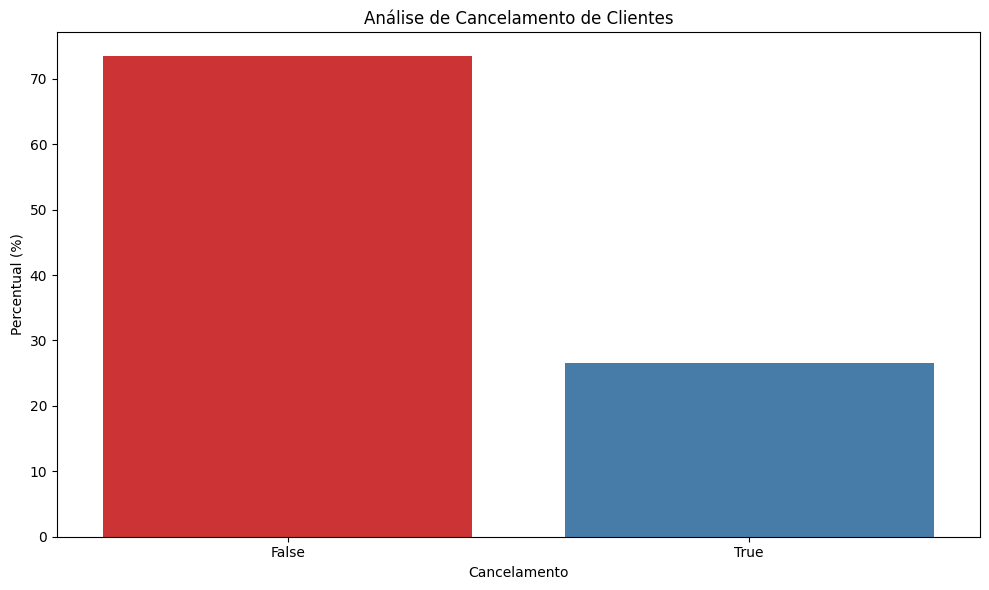


 Total de Cancelamentos:
Cancelamento
False    5163
True     1869
Name: count, dtype: int64

 Distribuição Percentual:
Cancelamento
False    73.42
True     26.58
Name: proportion, dtype: float64


In [30]:

contagem_cancelamentos = dados['Cancelamento'].value_counts()
percentual_cancelamentos = dados['Cancelamento'].value_counts(normalize=True) * 100


plt.figure(figsize=(10, 6))
sns.barplot(
    x=percentual_cancelamentos.index,
    y=percentual_cancelamentos.values,
    hue=percentual_cancelamentos.index,
    palette='Set1',
    dodge=False,
    legend=False
)
plt.ylabel('Percentual (%)')
plt.title('Análise de Cancelamento de Clientes')
plt.tight_layout()
plt.show()

print("\n Total de Cancelamentos:")
print("=" * 35)
print(contagem_cancelamentos)

print("\n Distribuição Percentual:")
print("=" * 35)
print(percentual_cancelamentos.round(2))



In [12]:

X = dados.loc[:, dados.columns != 'Cancelamento']

y = dados['Cancelamento']

In [13]:

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

print(" Distribuição das Classes OVERSAMPLING:")
print("=" * 35)
print(pd.Series(y_res).value_counts())


 Distribuição das Classes OVERSAMPLING:
Cancelamento
False    5163
True     5163
Name: count, dtype: int64


In [14]:

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

print(" Distribuição das Classes UNDERSAMPLING:")
print("=" * 35)
print(pd.Series(y_res).value_counts())

 Distribuição das Classes UNDERSAMPLING:
Cancelamento
False    1869
True     1869
Name: count, dtype: int64


In [15]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(" Distribuição das Classes do SMOTE:")
print("=" * 30)
print(pd.Series(y_res).value_counts())

 Distribuição das Classes do SMOTE:
Cancelamento
False    5163
True     5163
Name: count, dtype: int64


In [16]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = dados.drop('Cancelamento', axis=1)
y = dados['Cancelamento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


colunas_para_padronizar = ['Meses_de_Contrato', 'Valor_Mensal']

X_train_padronizado = X_train.copy()
X_test_padronizado = X_test.copy()


scaler = StandardScaler()

X_train_padronizado[colunas_para_padronizar] = scaler.fit_transform(X_train[colunas_para_padronizar])

X_test_padronizado[colunas_para_padronizar] = scaler.transform(X_test[colunas_para_padronizar])

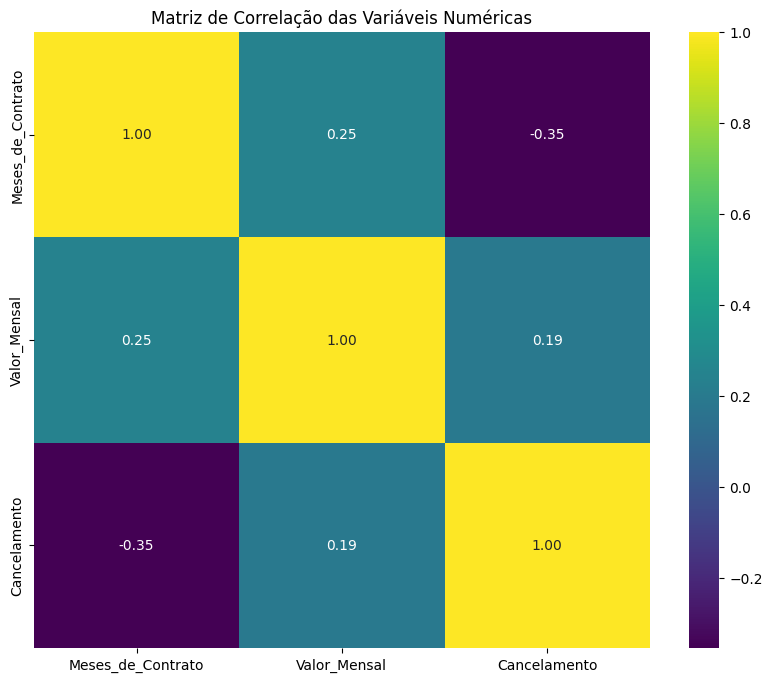

Correlação das variáveis numéricas com 'Cancelamento':
Valor_Mensal         0.192858
Meses_de_Contrato   -0.354049
Name: Cancelamento, dtype: float64


In [31]:

colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns.tolist()

if 'Cancelamento' not in colunas_numericas:
    colunas_numericas.append('Cancelamento')

dados_numericos = dados[colunas_numericas]
corr = dados_numericos.corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f", square=True)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

corr_com_alvo = corr['Cancelamento'].drop('Cancelamento').sort_values(ascending=False)

print("Correlação das variáveis numéricas com 'Cancelamento':")
print(corr_com_alvo)



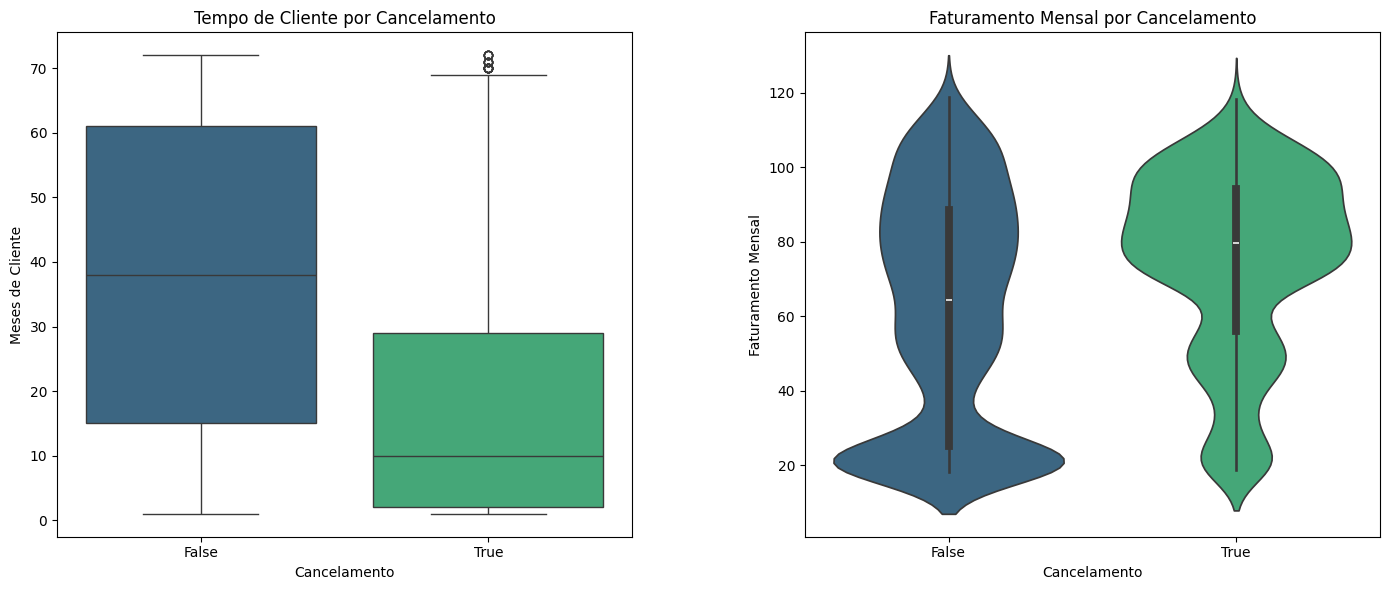

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1:
sns.boxplot(
    ax=axes[0],
    x='Cancelamento',
    y='Meses_de_Contrato',
    hue='Cancelamento',
    palette='viridis',
    data=dados
)
axes[0].set_title('Tempo de Cliente por Cancelamento', fontsize=12)
axes[0].set_ylabel('Meses de Cliente')


axes[0].legend_.remove()

# Gráfico 2:
sns.violinplot(
    ax=axes[1],
    x='Cancelamento',
    y='Valor_Mensal',
    hue='Cancelamento',
    palette='viridis',
    data=dados
)
axes[1].set_title('Faturamento Mensal por Cancelamento', fontsize=12)
axes[1].set_ylabel('Faturamento Mensal')

axes[1].legend_.remove()
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)

plt.show()

In [19]:

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

modelo_log = LogisticRegression()
modelo_log.fit(X_train_norm, y_train)


y_pred_log = modelo_log.predict(X_test_norm)

print(" Resultado do Modelo Logístico")
print("-" * 30)
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


 Resultado do Modelo Logístico
------------------------------
[[930 103]
 [179 195]]
              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1033
        True       0.65      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)


print(" Desempenho do Random Forest")
print("-" * 25)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


 Desempenho do Random Forest
-------------------------
[[936  97]
 [199 175]]
              precision    recall  f1-score   support

       False       0.82      0.91      0.86      1033
        True       0.64      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train_norm, y_train)
y_pred_knn = modelo_knn.predict(X_test_norm)

print(" Desempenho do KNN")
print("-" * 25)
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

 Desempenho do KNN
-------------------------
[[880 153]
 [189 185]]
              precision    recall  f1-score   support

       False       0.82      0.85      0.84      1033
        True       0.55      0.49      0.52       374

    accuracy                           0.76      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.75      0.76      0.75      1407



In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


modelo_dt = DecisionTreeClassifier(random_state=42)
modelo_dt.fit(X_train, y_train)
y_pred_dt = modelo_dt.predict(X_test)

print(" Desempenho da Árvore de Decisão")
print("-" * 25)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

 Desempenho da Árvore de Decisão
-------------------------
[[833 200]
 [185 189]]
              precision    recall  f1-score   support

       False       0.82      0.81      0.81      1033
        True       0.49      0.51      0.50       374

    accuracy                           0.73      1407
   macro avg       0.65      0.66      0.65      1407
weighted avg       0.73      0.73      0.73      1407



In [24]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


def gerar_metricas(nome, modelo, X_teste, y_teste, y_predito):
    cm = confusion_matrix(y_teste, y_predito)

    cm_str = f"[[{cm[0][0]}, {cm[0][1]}], [{cm[1][0]}, {cm[1][1]}]]"

    return {
        'Modelo': nome,
        'Acurácia': accuracy_score(y_teste, y_predito),
        'Precisão': precision_score(y_teste, y_predito),
        'Recall': recall_score(y_teste, y_predito),
        'F1-Score': f1_score(y_teste, y_predito),
        'Matriz de Confusão': cm_str
    }


resultados = [
    gerar_metricas("Resultado do Modelo Logístico", modelo_log, X_test_norm, y_test, y_pred_log),
    gerar_metricas("Desempenho do Random Forest", modelo_rf, X_test, y_test, y_pred_rf),
    gerar_metricas("Desempenho do KNN", modelo_knn, X_test_norm, y_test, y_pred_knn),
    gerar_metricas("Desempenho da Árvore de Decisão", modelo_dt, X_test, y_test, y_pred_dt)
]


df_resultados = pd.DataFrame(resultados).sort_values(by='F1-Score', ascending=False)


print(" Resultado Final dos Modelos")
print("-" * 26)
display(df_resultados.round(4))


 Resultado Final dos Modelos
--------------------------


,Modelo,Acurácia,Precisão,Recall,F1-Score,Matriz de Confusão
0,Resultado do Modelo Logístico,0.7996,0.6544,0.5214,0.5804,"[[930, 103], [179, 195]]"
1,Desempenho do Random Forest,0.7896,0.6434,0.4679,0.5418,"[[936, 97], [199, 175]]"
2,Desempenho do KNN,0.7569,0.5473,0.4947,0.5197,"[[880, 153], [189, 185]]"
3,Desempenho da Árvore de Decisão,0.7264,0.4859,0.5053,0.4954,"[[833, 200], [185, 189]]"


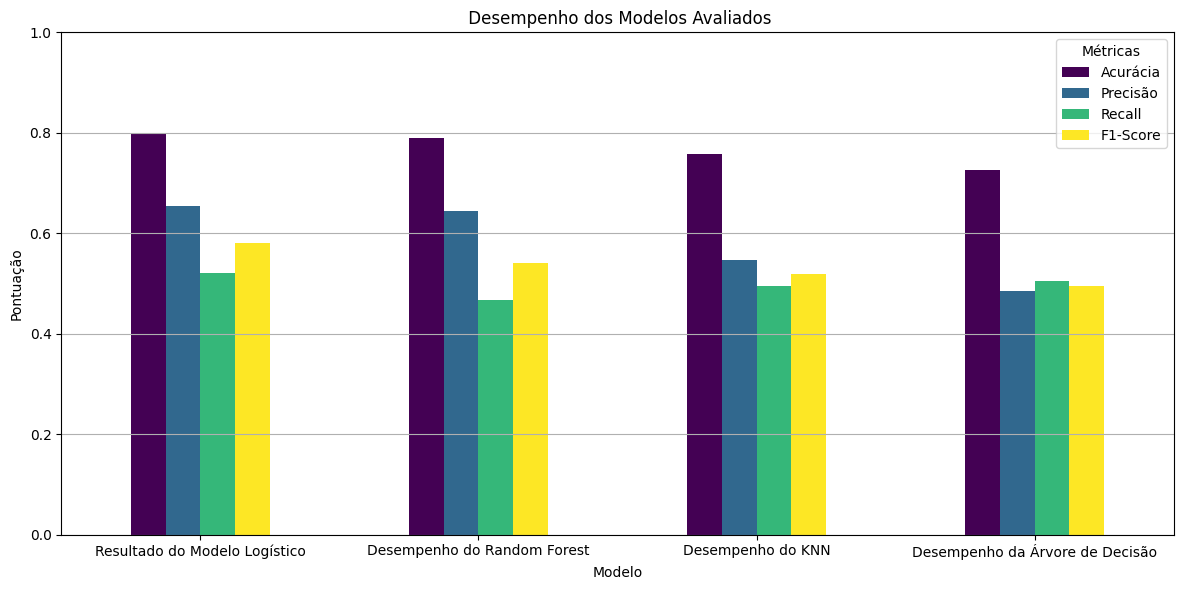

In [36]:

dados_modelos = pd.DataFrame({
    'Modelo': ['Resultado do Modelo Logístico', 'Desempenho do Random Forest', 'Desempenho do KNN', 'Desempenho da Árvore de Decisão'],
    'Acurácia': [0.7996, 0.7896, 0.7569, 0.7264],
    'Precisão': [0.6544, 0.6434, 0.5473, 0.4859],
    'Recall': [0.5214, 0.4679, 0.4947, 0.5053],
    'F1-Score': [0.5804, 0.5418, 0.5197, 0.4954]
})


dados_modelos.set_index('Modelo').plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title(' Desempenho dos Modelos Avaliados')
plt.ylabel('Pontuação')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Métricas')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2918932558.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importância', y='Variável', data=df_importancias, palette='viridis')


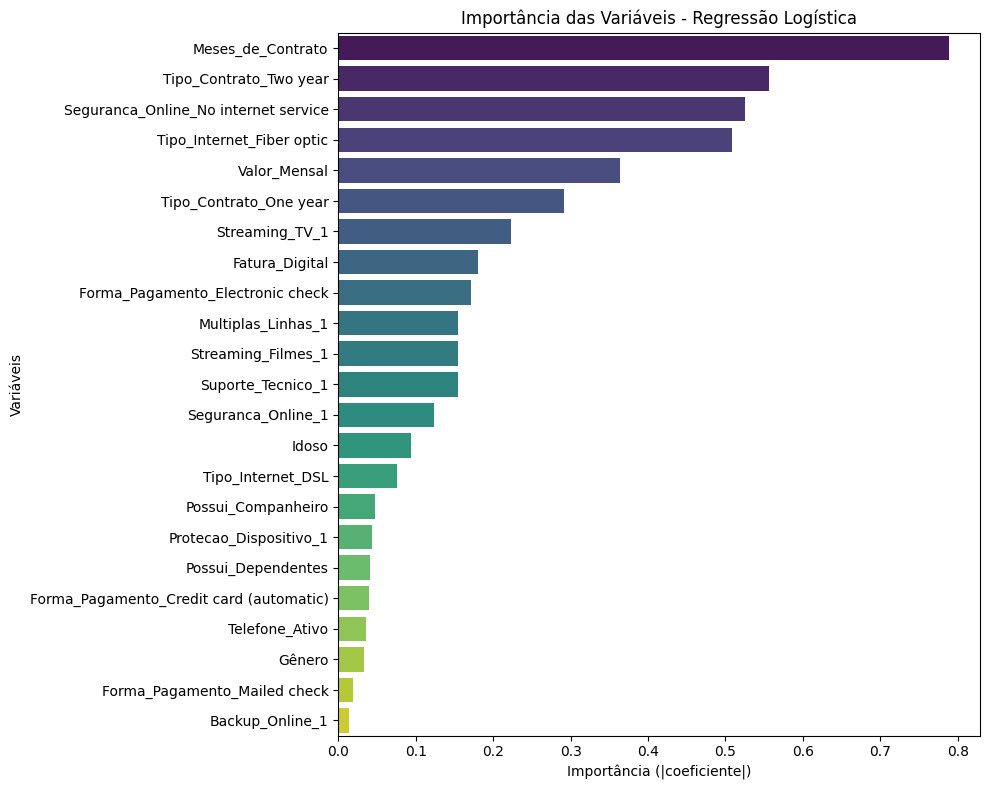

In [40]:

importances = abs(modelo_log.coef_[0])


feature_names = X_train.columns


df_importancias = pd.DataFrame({
    'Variável': feature_names,
    'Importância': importances
})


df_importancias = df_importancias.sort_values(by='Importância', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importância', y='Variável', data=df_importancias, palette='viridis')
plt.title('Importância das Variáveis - Regressão Logística')
plt.xlabel('Importância (|coeficiente|)')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()